<h2><a href="https://leetcode.com/problems/top-k-frequent-words">692. Top K Frequent Words</a></h2><h3>Medium</h3><hr><p>Given an array of strings <code>words</code> and an integer <code>k</code>, return <em>the </em><code>k</code><em> most frequent strings</em>.</p>

<p>Return the answer <strong>sorted</strong> by <strong>the frequency</strong> from highest to lowest. Sort the words with the same frequency by their <strong>lexicographical order</strong>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> words = [&quot;i&quot;,&quot;love&quot;,&quot;leetcode&quot;,&quot;i&quot;,&quot;love&quot;,&quot;coding&quot;], k = 2
<strong>Output:</strong> [&quot;i&quot;,&quot;love&quot;]
<strong>Explanation:</strong> &quot;i&quot; and &quot;love&quot; are the two most frequent words.
Note that &quot;i&quot; comes before &quot;love&quot; due to a lower alphabetical order.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> words = [&quot;the&quot;,&quot;day&quot;,&quot;is&quot;,&quot;sunny&quot;,&quot;the&quot;,&quot;the&quot;,&quot;the&quot;,&quot;sunny&quot;,&quot;is&quot;,&quot;is&quot;], k = 4
<strong>Output:</strong> [&quot;the&quot;,&quot;is&quot;,&quot;sunny&quot;,&quot;day&quot;]
<strong>Explanation:</strong> &quot;the&quot;, &quot;is&quot;, &quot;sunny&quot; and &quot;day&quot; are the four most frequent words, with the number of occurrence being 4, 3, 2 and 1 respectively.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= words.length &lt;= 500</code></li>
	<li><code>1 &lt;= words[i].length &lt;= 10</code></li>
	<li><code>words[i]</code> consists of lowercase English letters.</li>
	<li><code>k</code> is in the range <code>[1, The number of <strong>unique</strong> words[i]]</code></li>
</ul>

<p>&nbsp;</p>
<p><strong>Follow-up:</strong> Could you solve it in <code>O(n log(k))</code> time and <code>O(n)</code> extra space?</p>


## <italic> Brute Force using hashmap </italic>
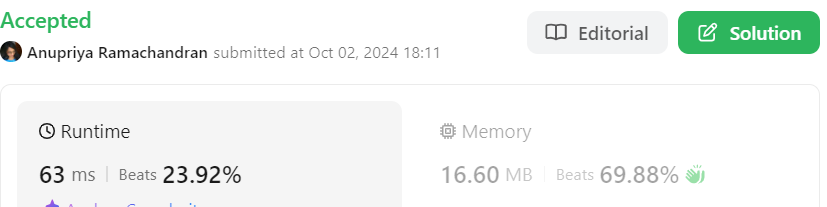

In [1]:
from typing import List

class Solution:
    def topKFrequent(self, words: List[str], k: int) -> List[str]:
        freq_map = dict()
        for word in words:
            freq_map[word] = freq_map.get(word, 0) + 1

        freq_map = dict(sorted(freq_map.items(), key = lambda x : (-x[1],x[0]) ))

        keys = list(freq_map.keys())
        return keys[:k]
        

# **Bucket Sorting**
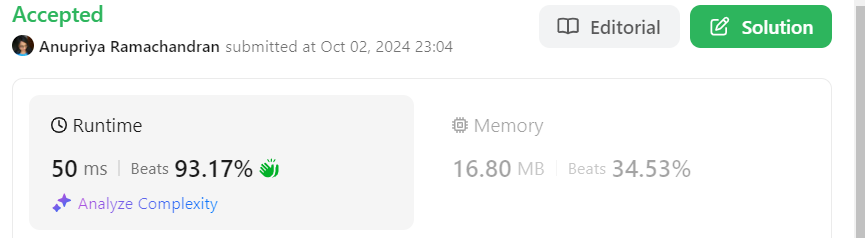

In [3]:
from collections import Counter
from typing import List
class Solution:
    def topKFrequent(self, words: List[str], k: int) -> List[str]:
        if k == 0:
            return 
        count = Counter(words)
        buckets = [[] for i in range(len(words) + 1)]

        # Add the words in bucket as per thier freqeuncy
        for word, freq in count.items():
            buckets[freq].append(word)

        # Sort the words in a partcular bucket lexicographically, since all have same freqeuncy
        for i in range(len(buckets)):
            buckets[i].sort()


        # Iterate buckets from backward to get the most frequent bucket
        result = []
        for i in range(len(buckets) - 1, 0, -1):
            for word in buckets[i]:
                result.append(word)

                if len(result) == k:
                    return result
